# Visualize data

In [1]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
def create_plant_metadata(root:str):
    dir_list = os.listdir(root)
    
    df_list = [create_df_from_dir(root, dir) for dir in dir_list]
    
    df = pd.concat(df_list, ignore_index=True)
    
    return df


def create_df_from_dir(root, dir):
    photo_names = os.listdir(os.path.join(root, dir))
    path = [os.path.join(root, dir, photo_name) for photo_name in photo_names]
    
    splitted_directory = dir.split('_')
    
    specie = splitted_directory[-1].lower()
    label = 1 if splitted_directory[0].lower() == 'diseased' else 0
    
    species = [specie] * len(photo_names)
    labels = [label] * len(photo_names)
    
    df = pd.DataFrame(
        {
            "path" : path,
            'species' : species,
            'diseased' : labels
        }
    )
    
    return df



df = create_plant_metadata('data/manipulated')

In [3]:
print('The classes: \n', np.unique(df['species']))

The classes: 
 ['apple' 'cherry' 'corn' 'grape' 'peach' 'pepper' 'potato' 'strawberry'
 'tomato']


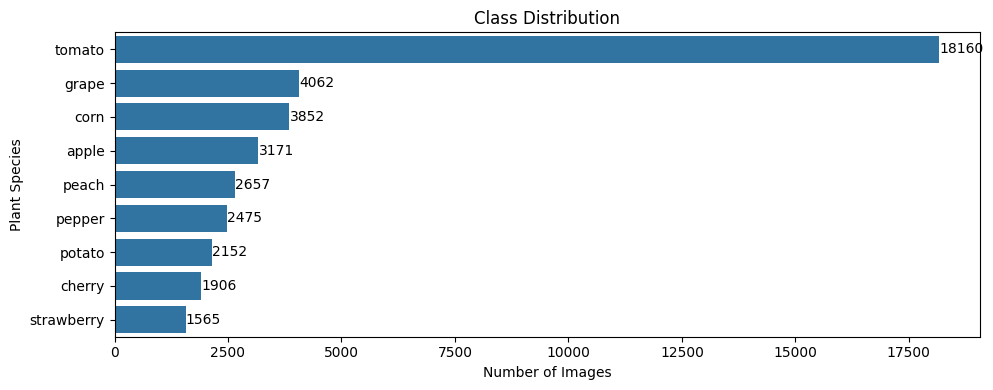

In [3]:
# visualize nr of images per specie

class_counts = df['species'].value_counts()

plt.figure(figsize=(10,4))
ax = sns.barplot(x=class_counts.values, y=class_counts.index, orient='h')
plt.title('Class Distribution')
plt.xlabel('Number of Images')
plt.ylabel('Plant Species')
plt.tight_layout()

for i, v in enumerate(class_counts.values):
    ax.text(v+5, i, str(v), color='black', va='center')
    
plt.show()

Error: Image path does not exist: /home/floor/projects/master_year_1/deep_learning/project/DeepLearning/DL/dl/data/manipulated/data/manipulated/Diseased_Apple/033b1492-d5cf-4de7-a195-941f7780e092___JR_FrgE.S 8710.JPG
Error: Image path does not exist: /home/floor/projects/master_year_1/deep_learning/project/DeepLearning/DL/dl/data/manipulated/data/manipulated/Diseased_Tomato/0a8967d4-bb72-4fe4-8096-55fc57437557___RS_Late.B 6974.JPG
Error: Image path does not exist: /home/floor/projects/master_year_1/deep_learning/project/DeepLearning/DL/dl/data/manipulated/data/manipulated/Diseased_Potato/0bbb8bce-2020-416b-8bd6-c160c2db9921___RS_Early.B 8386.JPG
Error: Image path does not exist: /home/floor/projects/master_year_1/deep_learning/project/DeepLearning/DL/dl/data/manipulated/data/manipulated/Diseased_Strawberry/83178057-79d0-46ab-ad87-858829d76aa2___RS_L.Scorch 0006.JPG
Error: Image path does not exist: /home/floor/projects/master_year_1/deep_learning/project/DeepLearning/DL/dl/data/manipul

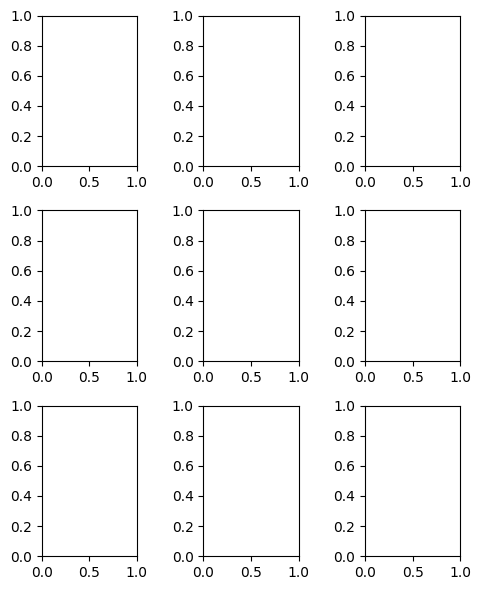

In [5]:
data_dir = '/home/floor/projects/master_year_1/deep_learning/project/DeepLearning/DL/dl/data/manipulated'

# Display sample images from each class
num_classes = len(df['species'].unique())
num_images_per_row = 3
num_rows = (num_classes + num_images_per_row - 1) // num_images_per_row

plt.figure(figsize=(5, 2 * num_rows))  

for i, plant_class in enumerate(df['species'].unique()):
    plt.subplot(num_rows, num_images_per_row, i + 1)
    
    # Inside the loop for displaying sample images
    image_path = os.path.join(data_dir, df[df['species'] == plant_class]['path'].iloc[0])

    # Check if the image exists and can be loaded
    if os.path.exists(image_path):
        sample_image = cv2.imread(image_path)
        if sample_image is not None:
            plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
            plt.title(plant_class)
            plt.axis('off')
        else:
            print(f"Error: Unable to load image from path: {image_path}")
    else:
        print(f"Error: Image path does not exist: {image_path}")

plt.tight_layout()
plt.show()

# Pre-processing

In [11]:
dir_list = os.listdir('data/manipulated')
dir_list

['Diseased_Apple',
 'Diseased_Tomato',
 'Diseased_Potato',
 'Diseased_Strawberry',
 'Healthy_Corn',
 'Diseased_Cherry',
 'Diseased_Grape',
 'Diseased_Pepper',
 'Healthy_Tomato',
 'Healthy_Peach',
 'Healthy_Cherry',
 'Healthy_Strawberry',
 'Healthy_Potato',
 'Healthy_Apple',
 'Healthy_Grape',
 'Diseased_Peach',
 'Healthy_Pepper',
 'Diseased_Corn']

In [13]:
# creates a df of every directory (diseased_species and healthy_species)
def create_df_from_dir(root:str, dir:str)->pd.DataFrame:
    photo_names = os.listdir(os.path.join(root, dir))
    path = [os.path.join(root, dir, photo_name) for photo_name in photo_names]
    
    splitted_directory = dir.split('_')
    
    specie = splitted_directory[-1].lower()
    label = 1 if splitted_directory[0].lower() == 'diseased' else 0
    
    species = [specie] * len(photo_names)
    labels = [label] * len(photo_names)
    
    df = pd.DataFrame(
        {
            "path" : path,
            'species' : species,
            'diseased' : labels
        }
    )
    
    return df

# concat dataframes of healthy tomato leaves and diseased leaves
def create_plant_metadata(root:str)-> pd.DataFrame:   
    tomatoes_healthy_diseased = [create_df_from_dir(root, 'Diseased_Tomato'), create_df_from_dir(root, 'Healthy_Tomato') ]
    
    df = pd.concat(tomatoes_healthy_diseased, ignore_index=True)
    
    return df

df = create_plant_metadata('data/manipulated')
df

,path,species,diseased
0,data/manipulated/Diseased_Tomato/0a8967d4-bb72...,tomato,1
1,data/manipulated/Diseased_Tomato/53b703ba-e5f3...,tomato,1
2,data/manipulated/Diseased_Tomato/3a835af7-08ba...,tomato,1
3,data/manipulated/Diseased_Tomato/dda6fd98-f44f...,tomato,1
4,data/manipulated/Diseased_Tomato/7fe35989-ae3c...,tomato,1
...,...,...,...
18155,data/manipulated/Healthy_Tomato/06d3fe74-beca-...,tomato,0
18156,data/manipulated/Healthy_Tomato/846276ae-4ccd-...,tomato,0
18157,data/manipulated/Healthy_Tomato/b089aa0a-1778-...,tomato,0
18158,data/manipulated/Healthy_Tomato/c30a18fe-8a24-...,tomato,0


In [7]:
df

,path,species,diseased
0,data/manipulated/Diseased_Apple/033b1492-d5cf-...,apple,1
1,data/manipulated/Diseased_Apple/5c9da5f6-93f9-...,apple,1
2,data/manipulated/Diseased_Apple/fc7d3fc0-1b3c-...,apple,1
3,data/manipulated/Diseased_Apple/402aad30-3914-...,apple,1
4,data/manipulated/Diseased_Apple/b0b2a38c-396d-...,apple,1
...,...,...,...
39995,data/manipulated/Diseased_Corn/RS_Rust 2573.JPG,corn,1
39996,data/manipulated/Diseased_Corn/201bc21a-5372-4...,corn,1
39997,data/manipulated/Diseased_Corn/0118e276-ee7b-4...,corn,1
39998,data/manipulated/Diseased_Corn/RS_Rust 2242.JPG,corn,1


In [14]:
# count of images per class

df.diseased.value_counts()

diseased
1    16569
0     1591
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from torchvision.io import read_image
from torchvision.transforms.functional import get_image_size, get_image_num_channels

def split_meta_data_in_train_test_val(df):
    X = df.loc[:, ["path", "species"]]
    y = df.drop(["path", "species"], axis=1)

    # train en test set maken - 0.2 test - stratify zorgt ervoor dat de verhouding DS en HL hetzelfde is in training en test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # validatie set aanmaken - 0.5 van test set 
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

    # join de labels met metadata
    all_data = X.merge(y, left_index=True, right_index=True).reset_index(drop=True)
    train_data = X_train.merge(y_train, left_index=True, right_index=True).reset_index(drop=True)
    test_data = X_test.merge(y_test, left_index=True, right_index=True).reset_index(drop=True)
    val_data = X_val.merge(y_val, left_index=True, right_index=True).reset_index(drop=True)
    
    return all_data, train_data, test_data, val_data

def drop_incorrect_images_from_metadata(df:pd.DataFrame, expected_img_size:list, expected_nr_channels:int) -> pd.DataFrame:
    expected_image_size = expected_img_size
    expected_nr_channels = expected_nr_channels
    
    for i in range(len(df)):
        image = read_image(df.loc[i, "path"])
        actual_image_size = get_image_size(image)
        actual_channels = get_image_num_channels(image)
    
        if expected_image_size != actual_image_size or expected_nr_channels != actual_channels:
            df = df.drop(i)
    
    return df.reset_index(drop=True)

df = drop_incorrect_images_from_metadata(df, [256,256], 3)

all_data, train, test, val = split_meta_data_in_train_test_val(df)


# os.mkdir("/home/floor/projects/master_year_1/deep_learning/project/DeepLearning/DL/dl/data/metadata/")
for data in [("all", all_data), ("train", train), ("test", test), ("val", val)]:
    data[1].to_parquet(f"data/metadata/{data[0]}.parquet")
    



In [17]:
from torch.utils.data import Dataset
from torchvision.io import read_image
import torch

# The __init__ function is run once when instantiating the Dataset object. 
# We initialize the directory containing the images, the annotations file, and both transforms (covered in more detail in the next section).

class PlantDataset(Dataset):
    def __init__(self, metadata_path, transform=None, target_transform=None) -> None:
        self.metadata_path = metadata_path
        self.transform = transform
        self.target_transform = target_transform
        
        self.meta_data = pd.read_parquet(metadata_path)
        
# The __len__ function returns the number of samples in our dataset.        
    
    def __len__(self):
        return self.meta_data.shape[0]

# The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, 
# converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), 
# and returns the tensor image and corresponding label in a tuple.    
    
    def __getitem__(self, index):
        image_path = self.meta_data.loc[index, "path"]
        
        image = read_image(image_path)
      
        label = self.meta_data.loc[index, "diseased"]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        
        label = torch.tensor(label, dtype=torch.int64)
        return image, label 


In [18]:
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# get DataLoaders for test and train 
training_data = PlantDataset("data/metadata/train.parquet")
test_data = PlantDataset("data/metadata/test.parquet")
train_dataloader = DataLoader(training_data, batch_size=2, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=2, shuffle=True)

Feature batch shape: torch.Size([2, 3, 256, 256])
Labels batch shape: torch.Size([2])


/tmp/ipykernel_21428/740714697.py:6: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3637.)
  img = train_features[0].squeeze().T


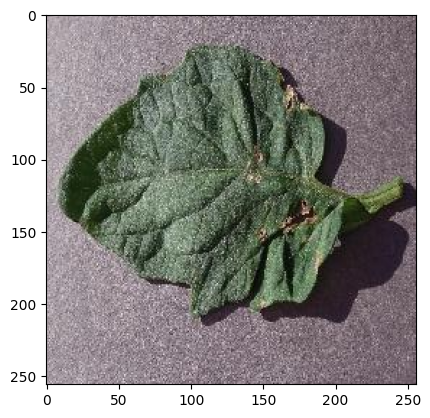

Label: 1


In [19]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
test_features, test_labels = next(iter(test_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze().T
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")

# Normalize 

In [20]:
def calculate_mean_and_variance(loader):
    mean = 0.0
    variance = 0.0
    total_images = 0

    for images, _ in loader:
        # Rearrange batch to be the shape of [B, C, W * H]
        images = images.view(images.size(0), images.size(1), -1)
        # Update total_images
        total_images += images.size(0)
        # Compute mean and variance here
        mean += images.float().mean(2).sum(0) 
        variance += images.float().var(2).sum(0)

    # Final mean and variance
    mean /= total_images
    variance /= total_images

    return mean, variance

# Assuming train_loader is defined and loaded
mean, variance = calculate_mean_and_variance(train_dataloader)
std = variance.sqrt()

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

Mean: tensor([114.5293, 118.5855, 101.9428])
Standard Deviation: tensor([43.6848, 38.2086, 47.7665])


In [21]:
from torchvision import transforms 

transform = transforms.Compose([
        transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)  # Normalize images
])

training_data = PlantDataset("data/metadata/train.parquet", transform=transform)
test_data = PlantDataset("data/metadata/test.parquet", transform=transform)
train_dataloader = DataLoader(training_data, batch_size=2, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=2, shuffle=True)

